TRABAJO PRÁCTICO Nº 3

Natasha Itzcovich - Mercedes Dertiano

# Conclusiones


1.   Se identificaron 100 clases distintas en la base de datos. Se graficó el histograma de estas clases y se observó que había igual cantidad de imágenes para cada clase, 425. 


2.   Se probó con distintas CNN vistas en clase (ResNet, AlexNet, VGG) y el modelo propuesto en las consignas del trabajo práctico. En todos se miró la evolución del accuracy tanto de train como de validación variando el Learning Rate, el número de epochs y el batch_size. En todos los casos, se vio que el accuracy en train aumentaba (con mayor o menor rapidez) pero el accuracy de validación aumentaba hasta no más de 0.38 y se quedaba fluctuando alrededor de este valor.


3. Para poder solucionar esto y la rapidez del entrenamiento, primero se implementó TRANSFER LEARNING con VGG16, considerando que nuestra base de datos era más pequeña y diferente. Es por esto que se eliminaron las capas densas fully connected de VGG. (incluso se probó también eliminar el último bloque convolucional con la capa de max pooling del VGG).


4. Luego, observando que el accuracy de validación seguía sin subir, consideramos que la base de datos era pequeña (solamente 425 imagenes por clase...) para la magnitud de la clasificación. Es por esto que se decidió hacer data augmentation rotando la imagen 180 grado y haciendo un flip horizontal y vertical. Igualmente seguimos sin tener buenos resultados...

5. En paralelo, se probaron distintos hiperparámetros de la capa convolucional (cantidad de filtros, tamaño del kernel, zero padding y funciones de activación: relu y sigm). Además, se utilizaron distintas cantidades de epochs y batch sizes, obteniendo el mejor desempeño con mas de 50 epochs y batch size de 32. Como se menciona anteriormente, los resultados obtenidos fueron mínimamente diferentes y no se logró obtener un desempeño destacable con alguna combinación de hiperparámetros analizada.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# TRATAMIENTO DE LOS DATOS

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Redes Neuronales/TP3'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#df = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/Datasets/insurance.csv', delimiter=',')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Armamos la red de clasificación
from tensorflow.keras.layers import Dense, Flatten, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, AveragePooling2D, Input
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

from matplotlib import pyplot as plt

In [ ]:
x_train_val = np.load("/content/drive/MyDrive/Redes Neuronales/TP3/x_train.npy")
x_test = np.load("/content/drive/MyDrive/Redes Neuronales/TP3/x_test.npy")
y_train_val = np.load("/content/drive/MyDrive/Redes Neuronales/TP3/y_train.npy")

In [ ]:
#Dividimos entre train y validación
valid_porcentage = 0.15
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=valid_porcentage, random_state=42, stratify=y_train_val)

In [ ]:
print('DATABASE tiene '+str(x_train_val.shape[0])+' imagenes, de tamaño  '+str(x_train_val.shape[1:])+' cada una.' )
print()
print('Porcentaje de validación: '+str(valid_porcentage))
print()
print('TRAIN tiene '+str(x_train.shape[0])+' imagenes, de tamaño  '+str(x_train.shape[1:])+' cada una.' )
print()
print('VALID tiene '+str(x_val.shape[0])+' imagenes, de tamaño  '+str(x_val.shape[1:])+' cada una.' )
print()
print('TEST tiene '+str(x_val.shape[0])+' imagenes, de tamaño  '+str(x_test.shape[1:])+' cada una.' )

DATABASE tiene 50000 imagenes, de tamaño  (32, 32, 3) cada una.

Porcentaje de validación: 0.15

TRAIN tiene 42500 imagenes, de tamaño  (32, 32, 3) cada una.

VALID tiene 7500 imagenes, de tamaño  (32, 32, 3) cada una.

TEST tiene 7500 imagenes, de tamaño  (32, 32, 3) cada una.


Text(0, 0.5, 'Nro de Imágenes')

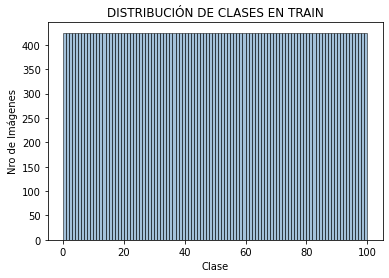

In [ ]:
plt.hist(x=y_train,bins=np.arange(0,101),alpha=0.5,edgecolor='black',color='steelblue', histtype='bar',lw=1)
plt.title('DISTRIBUCIÓN DE CLASES EN TRAIN')
plt.xlabel('Clase')
plt.ylabel('Nro de Imágenes')

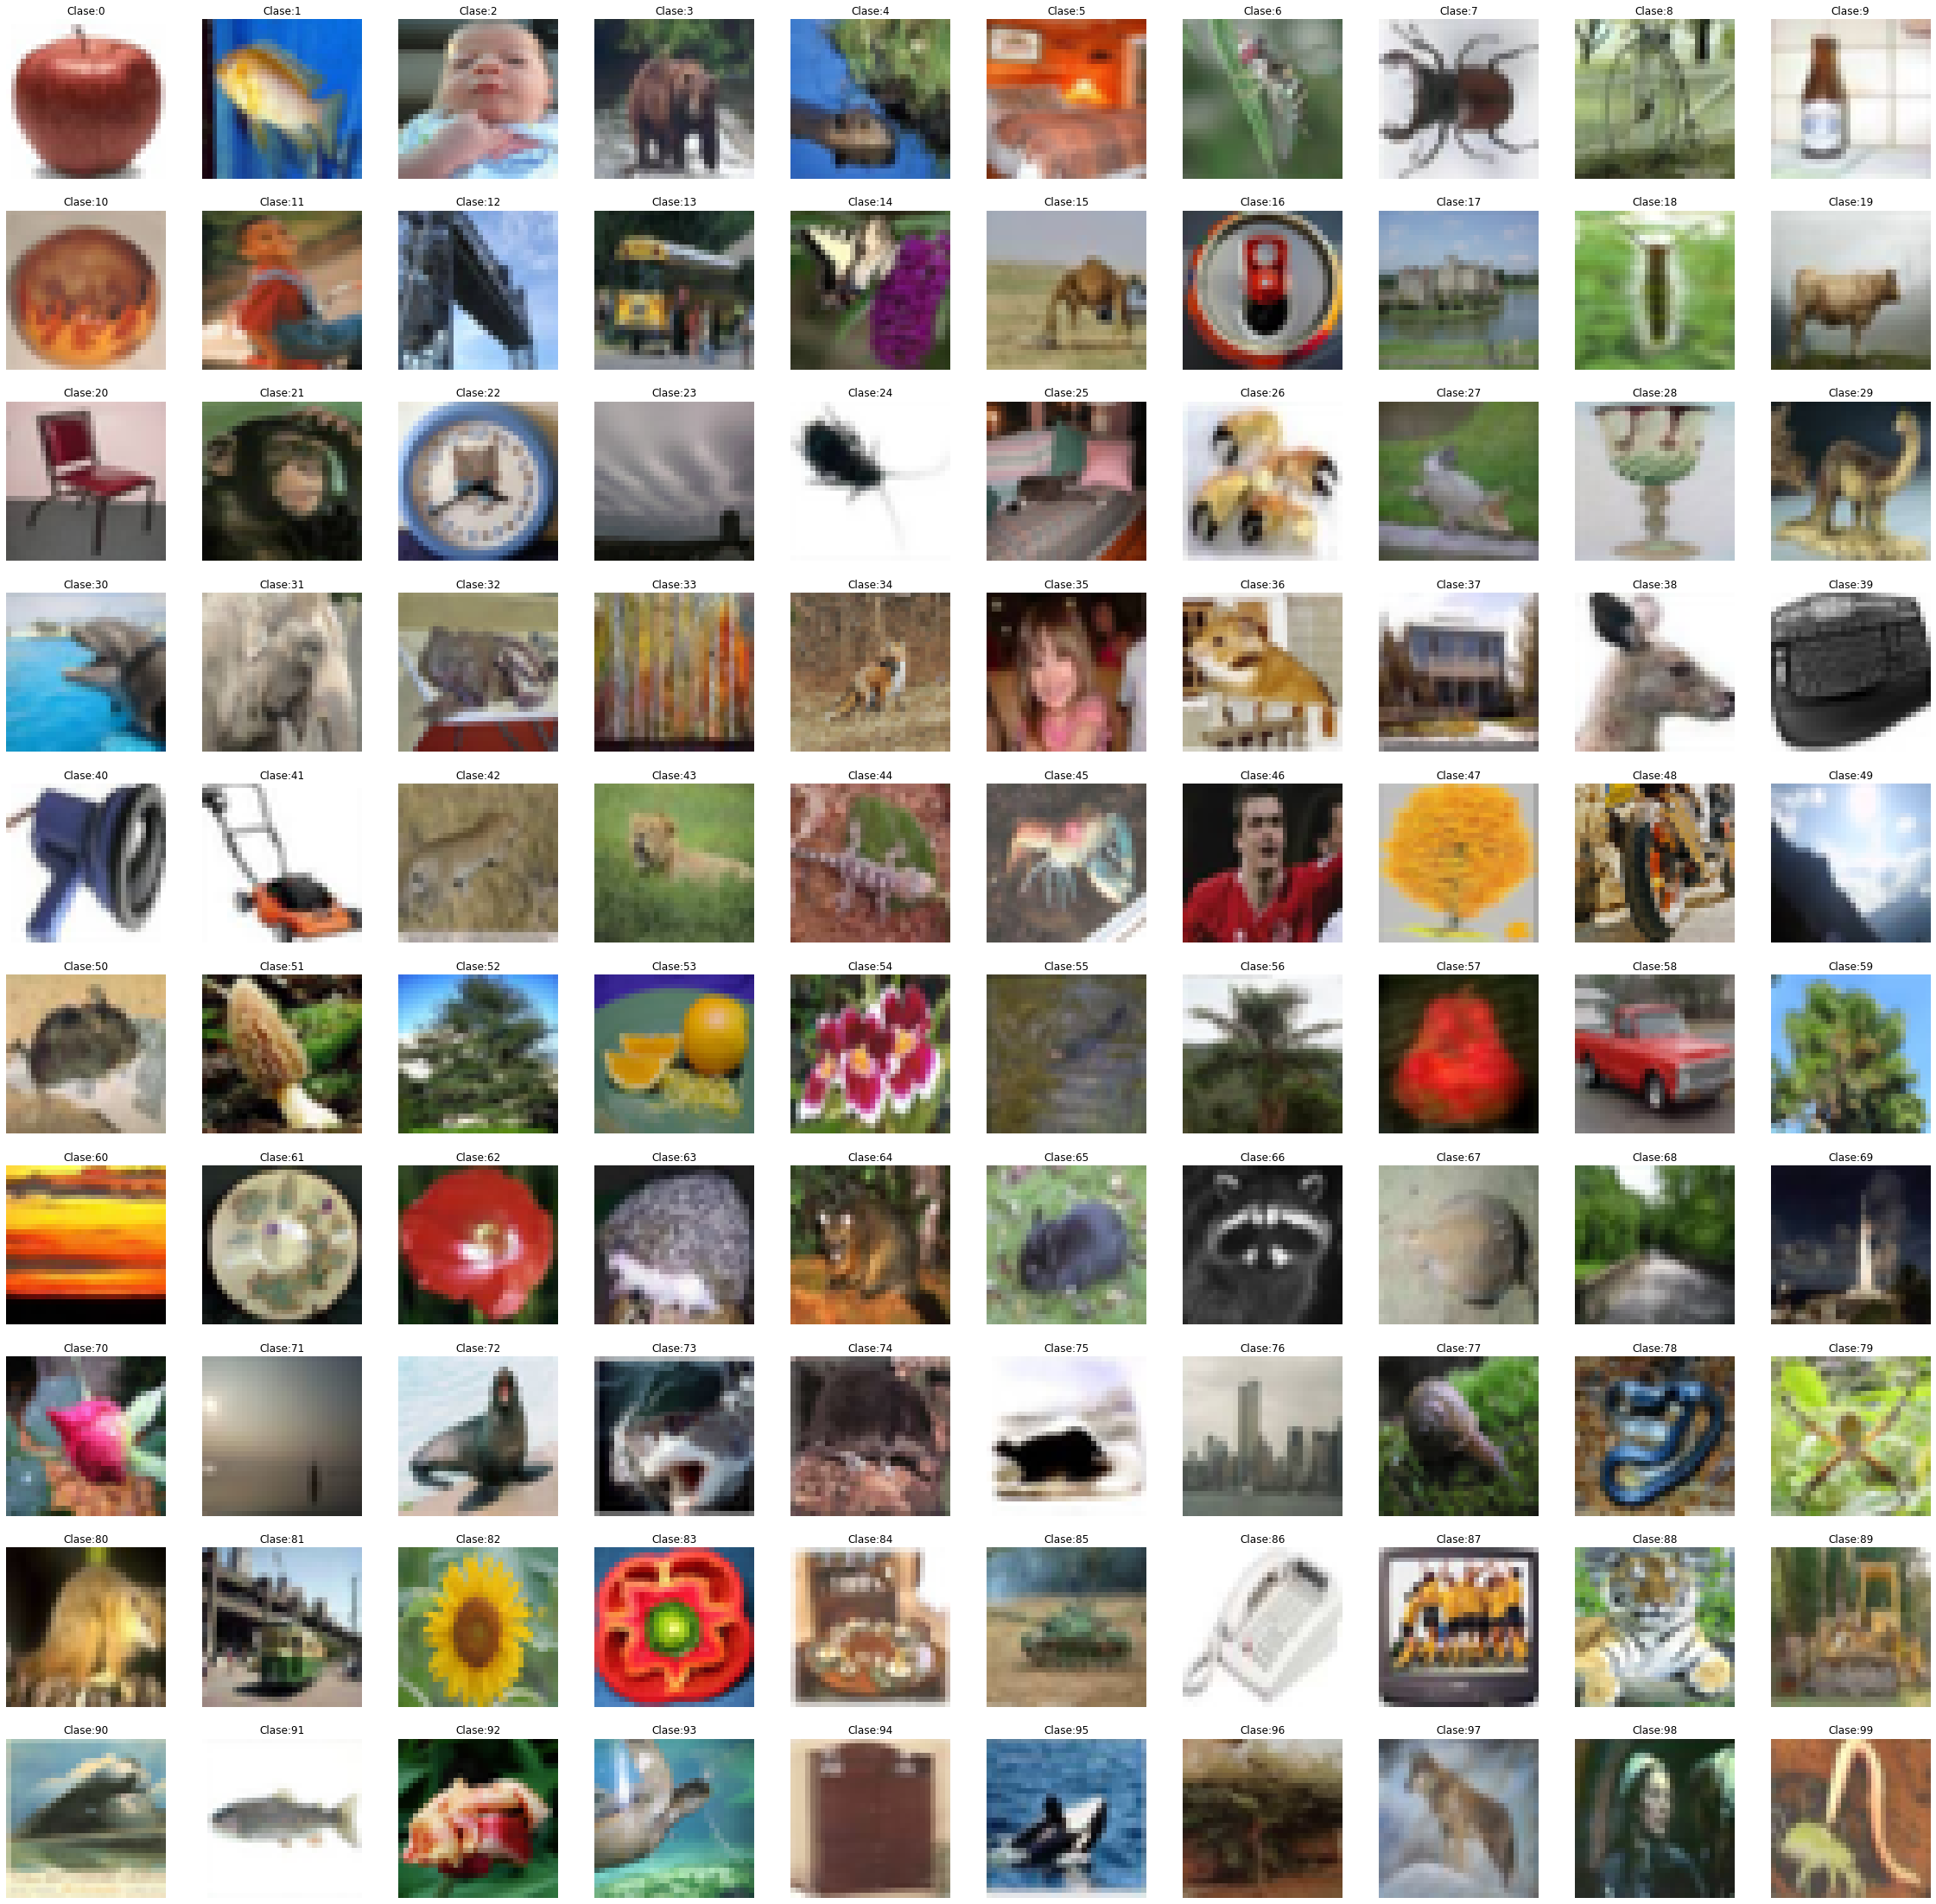

In [ ]:
#Imprimir una imagen de cada clase
fig = plt.figure(figsize=(40, 40))
rows = 10
columns = 10
nro_clases = 100
for i in range(0,nro_clases):
  h = np.where(y_train==i)
  idx = h[0][0]
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(x_train[idx])
  plt.axis('off')
  plt.title("Clase:"+str(i))

In [ ]:
#Normalizamos
x_train_norm = x_train/255
x_val_norm = x_val/255
x_test_norm = x_test/255

# MODELO CONSIGNA

In [ ]:
nro_clases = 100
LR = 0.1

In [ ]:
model = Sequential()
model.add(Conv2D(64,3, input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(128,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256,3))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(nro_clases, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer= Adam(learning_rate=LR), metrics=["accuracy"])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_9 (Batch (None, 30, 30, 64)        256       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_10 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
activation_10 (Activation)   (None, 13, 13, 128)      

In [ ]:
batch_size = 512
epocs = 50

In [ ]:
history = model.fit(x_train_norm, y_train, batch_size = batch_size, validation_data = (x_val_norm, y_val), epochs=epocs)

Epoch 1/50
84/84 [==============================] - 208s 2s/step - loss: 9.7674 - accuracy: 0.0146 - val_loss: 37.0147 - val_accuracy: 0.0172
Epoch 2/50
84/84 [==============================] - 208s 2s/step - loss: 4.3453 - accuracy: 0.0376 - val_loss: 5.8193 - val_accuracy: 0.0268
Epoch 3/50
56/84 [===================>..........] - ETA: 1:07 - loss: 4.2147 - accuracy: 0.0498

# DATA AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    #width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    #height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    #width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    #height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(x_train_norm)
datagen_valid.fit(x_val_norm)

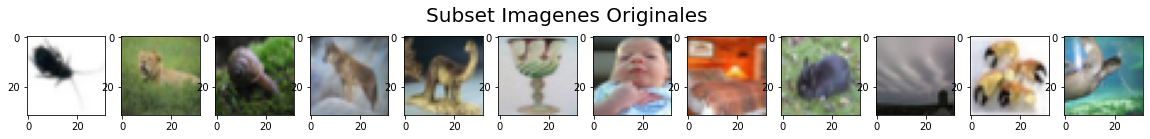

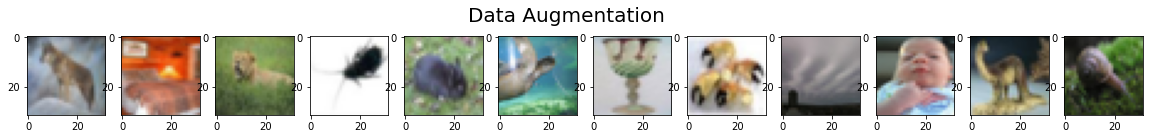

In [ ]:
x_train_subset = x_train_norm[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset Imagenes Originales', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset,batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Data Augmentation', fontsize=20)
    plt.show()
    break;

In [ ]:
l = []
l_y = []
for i in range(0,x_train_norm.shape[0]):
  new = x_train_norm[i,:,:,:]
  new_y = y_train[i][0]
  l.append(new)
  l_y.append(new_y)

l_rot = []
l_y_rot = []
for i in range(0,x_train_norm.shape[0]):
  new = np.rot90(x_train_norm[i,:,:,:],2)
  new_y = y_train[i][0]
  l_rot.append(new)
  l_y_rot.append(new_y)

l_flipV = []
l_y_flipV = []
for i in range(0,x_train_norm.shape[0]):
  new = np.fliplr(x_train_norm[0,:,:,:])
  new_y = y_train[i][0]
  l_flipV.append(new)
  l_y_flipV.append(new_y)

l_flipH = []
l_y_flipH = []
for i in range(0,x_train_norm.shape[0]):
  new = np.flipud(x_train_norm[0,:,:,:])
  new_y = y_train[i][0]
  l_flipH.append(new)
  l_y_flipH.append(new_y)


In [ ]:
#l = l + l_rot + l_flipH + l_flipV
#l_y = l_y + l_rot + l_y_flipH + l_y_flipV

In [ ]:
l_y_train = np.append(y_train,y_train)

In [ ]:
l_y_train.shape

(85000,)

In [ ]:
#l = l + l_rot
#l_y = l_y + l_rot

In [ ]:
DA_x_train = np.array(l)

In [ ]:
DA_x_train.shape

(85000, 32, 32, 3)

# TRANSFER LEARNING


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

#include_top = False -> no incluir las ultimas capas densas de la VGG16
preproc=VGG16(include_top = False, pooling = None, weights="imagenet",input_shape=(32,32,3))

In [ ]:
# extract train and val features
x_pre_train=preproc.predict(x_train_norm)
x_pre_valid=preproc.predict(x_val_norm)

In [ ]:
# DATA AUGMENTATION
batch_size = 32
epochs = 100
x_pre_train_DA = preproc.predict(DA_x_train)
x_pre_valid_DA = preproc.predict(x_val_norm)
#x_pre_train_DA = preproc.predict(datagen_train.flow(x_train_norm,y=y_train, batch_size=batch_size))
#x_pre_valid_DA = preproc.predict(datagen_valid.flow(x_val_norm,y=y_val,batch_size=batch_size))

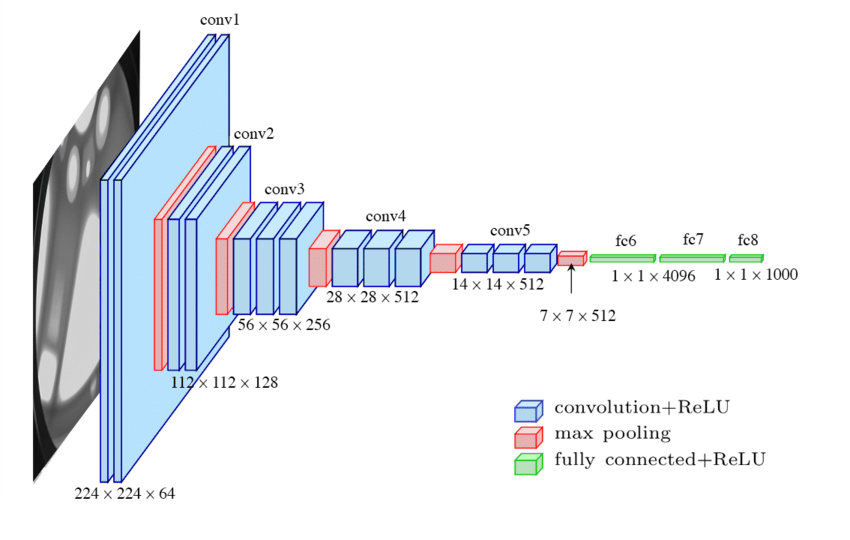

In [ ]:
preproc.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
#Se considera que se tiene un tamaño de train pequeño
#apagan las últimas capas que son mas especificas
min=15
max_noincluye=19
for i in range(min,max_noincluye):
  preproc.layers[i].trainable == False

In [ ]:
preproc.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)
y_val_categorical = to_categorical(y_val)

y_train_categorical_da = to_categorical(l_y_train)
y_val_categorical_da = to_categorical(y_val)

In [ ]:
from tensorflow.keras.optimizers import Adam
nro_clases = 100
input_preproc=Input(shape=(1,1,512))

net=Flatten()(input_preproc)

net=Dense(units=nro_clases, activation = 'softmax')(net)

model=Model(input_preproc,net)

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1, 512)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               51300     
Total params: 51,300
Trainable params: 51,300
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 128
epocs = 100

history3 = model.fit(x_pre_train, y_train_categorical, epochs=epocs, batch_size=batch_size, verbose=1, validation_data = (x_pre_valid, y_val_categorical),callbacks=[])


Epoch 1/100
333/333 [==============================] - 1s 3ms/step - loss: 2.1290 - accuracy: 0.4413 - val_loss: 2.9032 - val_accuracy: 0.3308
Epoch 2/100
333/333 [==============================] - 1s 3ms/step - loss: 2.1031 - accuracy: 0.4463 - val_loss: 2.8930 - val_accuracy: 0.3307
Epoch 3/100
333/333 [==============================] - 1s 3ms/step - loss: 2.0847 - accuracy: 0.4522 - val_loss: 2.8894 - val_accuracy: 0.3329
Epoch 4/100
333/333 [==============================] - 1s 3ms/step - loss: 2.0715 - accuracy: 0.4529 - val_loss: 2.8774 - val_accuracy: 0.3364
Epoch 5/100
333/333 [==============================] - 1s 3ms/step - loss: 2.0583 - accuracy: 0.4562 - val_loss: 2.8723 - val_accuracy: 0.3356
Epoch 6/100
333/333 [==============================] - 1s 3ms/step - loss: 2.0472 - accuracy: 0.4593 - val_loss: 2.8658 - val_accuracy: 0.3357
Epoch 7/100
333/333 [==============================] - 1s 3ms/step - loss: 2.0384 - accuracy: 0.4616 - val_loss: 2.8660 - val_accuracy: 0.3379

In [ ]:
#DA

batch_size = 128
epocs = 1000

history3 = model.fit(x_pre_train_DA, y_train_categorical_da, epochs=epocs, batch_size=batch_size, verbose=1, validation_data = (x_pre_valid_DA, y_val_categorical_da),callbacks=[])


Epoch 1/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2561 - accuracy: 0.4118 - val_loss: 2.7982 - val_accuracy: 0.3268
Epoch 2/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2443 - accuracy: 0.4152 - val_loss: 2.7942 - val_accuracy: 0.3271
Epoch 3/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2379 - accuracy: 0.4171 - val_loss: 2.7970 - val_accuracy: 0.3268
Epoch 4/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2343 - accuracy: 0.4169 - val_loss: 2.7962 - val_accuracy: 0.3283
Epoch 5/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2312 - accuracy: 0.4184 - val_loss: 2.7972 - val_accuracy: 0.3303
Epoch 6/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2287 - accuracy: 0.4179 - val_loss: 2.8018 - val_accuracy: 0.3263
Epoch 7/1000
665/665 [==============================] - 2s 3ms/step - loss: 2.2256 - accuracy: 0.4195 - val_loss: 2.8030 - val_accuracy:

KeyboardInterrupt: ignored

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(18,5))
ax1.plot(history3.history['loss'], label="loss")
ax1.plot(history3.history['val_loss'], label="val_loss")
ax1.legend()

ax2.plot(history3.history['accuracy'], label="accuracy")
ax2.plot(history3.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show();

# TEST

In [ ]:
y_test = model.predict(x_test_norm).argmax(axis=-1)

In [ ]:
y_test

array([30, 80, 46, ..., 96, 78, 70])

In [ ]:
#Salvo las predicciones y genero el archivo csv según el formato pedido
df = pd.DataFrame(y_test, columns=["label"])
df.index.name = "Id"
df.to_csv('/content/drive/MyDrive/Redes Neuronales/TP3/submission_TPmodel.csv')